In [ ]:
#computer vision libarary 'torchvision'

import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matploatlib
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.4.0+cu121
0.19.0+cu121


In [ ]:
#getting a training datasets
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16184321.50it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 265026.95it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4857199.82it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13461519.32it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# see the first training example
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
print(f"image shape: {image.shape}, label: {label}")

image shape: torch.Size([1, 28, 28]), label: 9


Image shape torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

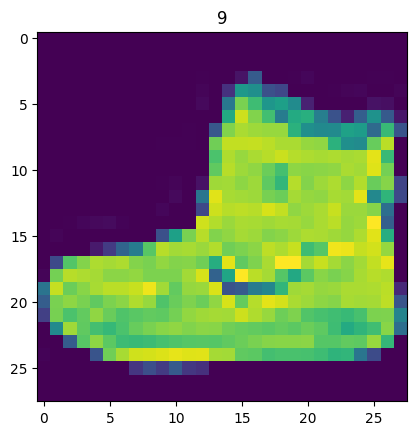

In [ ]:
# visualizing the image
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

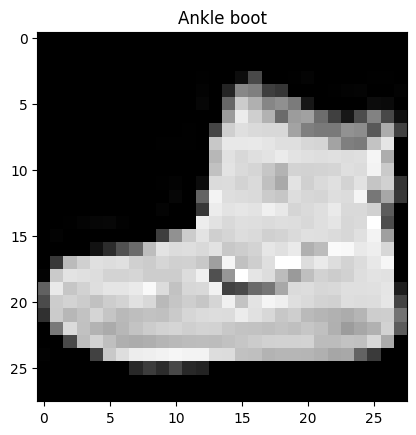

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

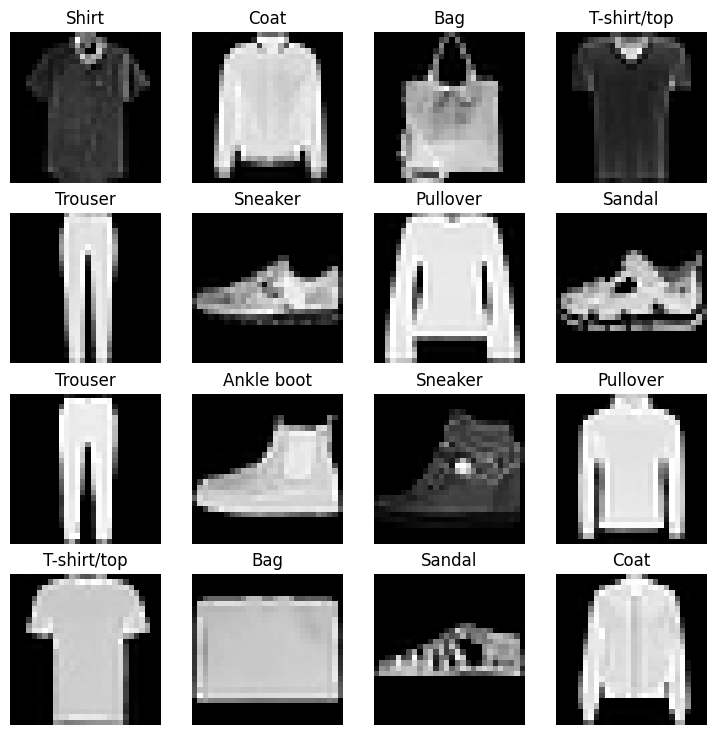

In [ ]:
#plot more image
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
row,col = 4,4
for i in range(1,row*col+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(row, col, i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)





In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
from torch.utils.data import DataLoader

#setup batch size hyperparameter
BATCH_SIZE = 32

# turn data into iterable

train_dataloader =  DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f974815a6b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f974815bd90>)

In [ ]:
print(f"DataLoader :{train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")


DataLoader :(<torch.utils.data.dataloader.DataLoader object at 0x7f974815a6b0>, <torch.utils.data.dataloader.DataLoader object at 0x7f974815bd90>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [ ]:
#check inside training data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])


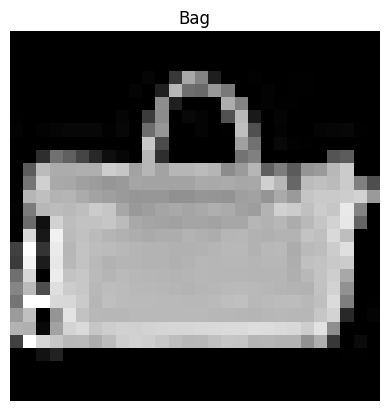

In [ ]:
#show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")


In [ ]:
# model_0 : build baseline model

# flatten layer
flatten_model = nn.Flatten()

# get a single ample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x)

# print out what happen
print(f"shape before flatten: {x.shape}")
print(f"shape after flatten: {output.shape}")


shape before flatten: torch.Size([1, 28, 28])
shape after flatten: torch.Size([1, 784])


In [ ]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_units: int,):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x):
      return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=16,
                              output_shape=len(class_names)).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[ 0.0599, -0.0578, -0.1531, -0.3557, -0.1761,  0.0471,  0.2426, -0.5298,
         -0.0458, -0.0342]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0313, -0.0194, -0.0231,  ...,  0.0165,  0.0038,  0.0114],
                      [-0.0301, -0.0315, -0.0168,  ...,  0.0032,  0.0287, -0.0005],
                      [-0.0150, -0.0167, -0.0028,  ...,  0.0172,  0.0117, -0.0291]])),
             ('layer_stack.1.bias',
              tensor([ 0.0214,  0.0289,  0.0107,  0.0284, -0.0170, -0.0234, -0.0287, -0.0056,
                      -0.0035, -0.0203, -0.0122, -0.0115,  0.0344, -0.0026,  0.0290,  0.0034])),
             ('layer_stack.2.weight',
              tensor([[ 0.0891,  0.1441, -0.2301, -0.1127, -0.1900,  0.2429,  0.0917, -0.1048,
                       -0.1885,  0.1384,  0.0580, -0.1230, -0.1814, 

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

In [ ]:
# setup loss and optimizer

#loss
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.Adam(model_0.parameters(),lr=0.01)

In [ ]:
# creating a funtion to time our experiment

from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device : torch.device =None):
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time


In [ ]:
# creating traing loop

# import progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
start = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n======")

  train_loss = 0
  #add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    #forward pass
    y_logits = model_0(X)

    #calculate loss
    loss = loss_fn(y_logits,y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch %400 ==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)}")

  train_loss /= len(train_dataloader)

  test_loss, test_acc =0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #forward pass
      test_logits = model_0(X_test)

      # calculate loss
      test_loss += loss_fn(test_logits, y_test)

      test_acc += accuracy_fn(y_test, test_logits.argmax(dim=1))

    # calculate test loss average per batch
    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.4f} |test loss: {test_loss:.4f}, test acc: {test_acc:.4f}")
end = timer()
print(print_train_time(start,end,'cpu'))


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.5756 |test loss: 0.5211, test acc: 81.5096
Epoch: 1
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.5153 |test loss: 0.5114, test acc: 82.4181
Epoch: 2
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.4928 |test loss: 0.5627, test acc: 81.1202
Epoch: 3
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.4894 |test loss: 0.5461, test acc: 82.4780
Epoch: 4
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.4856 |test loss: 0.5543, test acc: 81.8990
Epoch: 5
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.4789 

In [ ]:
#make prediction get model_0 results
torch.manual_seed(42)
def eval_model(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn, device):
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X = X.to(device)
      y =y.to(device)
      y_pred = model(X)

      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y,y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            'model_loss': loss.item(),
            "model_acc": acc}

# model_0_results = eval_model(model_0,test_dataloader,
#                              loss_fn,
#                              accuracy_fn)
# model_0_results

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from torch import nn

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_units: int,):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x):
      return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=16,
                              output_shape=len(class_names)).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=16, bias=True)
    (4): ReLU()
    (5): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [ ]:
#loss
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.Adam(model_1.parameters(),lr=0.01)

In [ ]:
from tqdm.auto import tqdm


torch.manual_seed(42)
start = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n======")

  train_loss = 0
  #add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    X = X.to(device)
    y = y.to(device)
    model_1.train()

    #forward pass
    y_logits = model_1(X)

    #calculate loss
    loss = loss_fn(y_logits,y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch %400 ==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)}")

  train_loss /= len(train_dataloader)

  test_loss, test_acc =0,0
  model_1.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      X_test = X_test.to(device)
      y_test = y_test.to(device)
      #forward pass
      test_logits = model_1(X_test)

      # calculate loss
      test_loss += loss_fn(test_logits, y_test)

      test_acc += accuracy_fn(y_test, test_logits.argmax(dim=1))

    # calculate test loss average per batch
    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.4f} |test loss: {test_loss:.4f}, test acc: {test_acc:.4f}")
end = timer()

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.5716 |test loss: 0.4902, test acc: 82.8375
Epoch: 1
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.4771 |test loss: 0.4695, test acc: 83.5863
Epoch: 2
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.4596 |test loss: 0.4967, test acc: 82.9772
Epoch: 3
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.4470 |test loss: 0.4880, test acc: 83.1669
Epoch: 4
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.4422 |test loss: 0.4955, test acc: 82.7776
Epoch: 5
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.4335 

In [ ]:
print(print_train_time(start,end,'cuda'))

Train time on cuda: 189.070 seconds
189.07030079299994


In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


In [ ]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)
start = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
  print(f'Epoch : {epoch}\n======= ')
  train_step(model_1,train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)
  test_step(test_dataloader,
            model_1,
            loss_fn,
            accuracy_fn,
            device)
end = timer()
print(print_train_time(start,end,device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0
Train loss: 0.42040 | Train accuracy: 85.23%
Test loss: 0.45711 | Test accuracy: 84.38%

Epoch : 1
Train loss: 0.41801 | Train accuracy: 85.26%
Test loss: 0.53828 | Test accuracy: 82.29%

Epoch : 2
Train loss: 0.41160 | Train accuracy: 85.65%
Test loss: 0.49443 | Test accuracy: 83.11%

Epoch : 3
Train loss: 0.41417 | Train accuracy: 85.59%
Test loss: 0.48623 | Test accuracy: 83.85%

Epoch : 4
Train loss: 0.40925 | Train accuracy: 85.80%
Test loss: 0.49045 | Test accuracy: 83.59%

Train time on cpu: 89.696 seconds
89.69604856800004


In [ ]:
eval_model(model_1,test_dataloader,loss_fn,
           accuracy_fn,device)

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4904502034187317,
 'model_acc': 83.58626198083067}

In [ ]:
# create a convolutional neural network

class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    #create conv layer
    self.conv_block = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  stride=1,
                  padding=1,kernel_size=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
     x = self.conv_block(x)
     #print(x.shape)
     x = self.conv_block_2(x)
     #print(x.shape)
     x = self.classifier(x)
     return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
model_2(test_image.unsqueeze(0))

torch.Size([1, 10, 32, 32])
torch.Size([1, 10, 16, 16])


tensor([[ 0.0054, -0.0557, -0.0202,  0.0082, -0.0297, -0.0022, -0.0815,  0.0299,
          0.0101, -0.0091]], grad_fn=<AddmmBackward0>)

In [ ]:
torch.manual_seed(42)

images = torch.randn(size=(32,1,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"test image:\n {test_image}")

Image batch shape: torch.Size([32, 1, 64, 64])
Single image shape: torch.Size([1, 64, 64])
test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]]])


In [ ]:
model_2.state_dict()

OrderedDict([('conv_block.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
        

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# create single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,out_channels=10,
                       kernel_size=(5,5),
                       stride=1,
                       padding=0)

#pass the data through conv layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[-5.9479e-01,  5.1592e-01, -1.5861e+00,  ..., -9.0964e-02,
           4.6227e-01, -6.0360e-01],
         [ 3.4598e-01, -1.7241e-01, -4.1079e-01,  ...,  1.6331e-01,
           5.2090e-01,  1.3144e+00],
         [-2.8077e-02, -4.4019e-01, -1.2165e+00,  ..., -2.4385e-01,
          -2.4841e-01,  3.5551e-01],
         ...,
         [ 6.3600e-01,  2.2507e-01,  2.0247e-01,  ...,  3.0973e-01,
           1.3567e-01,  7.5306e-02],
         [-8.4161e-01,  1.1192e-01,  1.7929e-01,  ...,  5.0107e-01,
          -6.6306e-01,  4.7155e-01],
         [ 1.0285e+00,  1.5175e+00,  5.5489e-01,  ..., -7.3607e-01,
          -7.1551e-01, -8.6667e-01]],

        [[ 1.3999e-01, -1.2239e+00, -1.0109e+00,  ...,  6.2065e-01,
          -7.5165e-01,  1.1006e+00],
         [-4.6926e-01,  4.6811e-01,  2.8089e-01,  ..., -2.5950e-01,
           1.1656e+00, -2.9479e-01],
         [ 1.5869e-01, -1.5092e-01,  1.5218e+00,  ...,  4.4120e-01,
           1.9650e-01,  5.0309e-01],
         ...,
         [ 1.1853e+00,  4

In [ ]:
conv_output.shape

torch.Size([10, 60, 60])

In [ ]:
# nn.MaxPool2d
max_pool = nn.MaxPool2d(kernel_size=2)

pool_out = max_pool(test_image)
pool_out.shape

torch.Size([3, 32, 32])

In [ ]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1,1,2,2))
print(random_tensor)
max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(max_pool_tensor)
max_pool_tensor.shape, random_tensor.shape

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
tensor([[[[0.3367]]]])


(torch.Size([1, 1, 1, 1]), torch.Size([1, 1, 2, 2]))

In [ ]:
# training cnn model
# loss function
loss_fn = nn.CrossEntropyLoss()
#optimizer
optimizer = torch.optim.Adam(model_2.parameters(),lr=0.01)

In [ ]:
torch.manual_seed(42)

start = timer()
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n==============")
  train_step(model_2,train_dataloader,loss_fn,
           optimizer,accuracy_fn,device)
  test_step(test_dataloader, model_2,loss_fn,
            accuracy_fn,device)
end= timer()
print(print_train_time(start,end,device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
Train loss: 0.48788 | Train accuracy: 82.28%
Test loss: 0.39662 | Test accuracy: 85.52%

Epoch: 1
Train loss: 0.37705 | Train accuracy: 86.18%
Test loss: 0.40823 | Test accuracy: 84.90%

Epoch: 2
Train loss: 0.35782 | Train accuracy: 86.86%
Test loss: 0.36998 | Test accuracy: 86.72%

Epoch: 3
Train loss: 0.35690 | Train accuracy: 86.94%
Test loss: 0.38423 | Test accuracy: 86.04%

Epoch: 4
Train loss: 0.34790 | Train accuracy: 87.18%
Test loss: 0.36686 | Test accuracy: 86.94%

Train time on cpu: 312.085 seconds
312.08541702499997


In [ ]:
# get model_2 results
model_2_results = eval_model(
    model_2,
    test_dataloader,
    loss_fn,
    accuracy_fn,
    device
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3668612539768219,
 'model_acc': 86.9408945686901}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([eval_model(
    model_0,
    test_dataloader,
    loss_fn,
    accuracy_fn,
    device
),
                                eval_model(
    model_1,
    test_dataloader,
    loss_fn,
    accuracy_fn,
    device
),
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.533406,82.408147
1,FashionMNISTModelV1,0.490450,83.586262
2,FashionMNISTModelV2,0.366861,86.940895


In [ ]:
def make_predictions(model,data,device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:

      sample = torch.unsqueeze(sample,dim=0).to(device)
      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)




In [ ]:
import random
#random.seed(42)
test_samples =[]
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

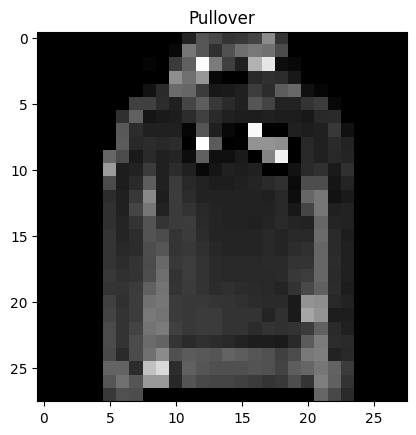

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
#make prediction
pred_probs = make_predictions(model_2,test_samples,device)
pred_probs[:2]

tensor([[1.6964e-02, 2.1496e-03, 7.5267e-01, 7.3482e-03, 1.9998e-01, 3.3544e-06,
         2.0503e-02, 1.3581e-06, 3.3264e-04, 5.0375e-05],
        [1.1270e-04, 9.5834e-05, 1.5071e-01, 7.5027e-05, 8.4692e-01, 1.8528e-09,
         1.9639e-03, 2.8442e-12, 1.1854e-04, 7.4020e-09]])

In [ ]:
#conver in to label
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 4, 6, 3, 2, 2, 0, 1, 1])

In [ ]:
test_labels

[2, 4, 6, 3, 2, 2, 0, 1, 1]

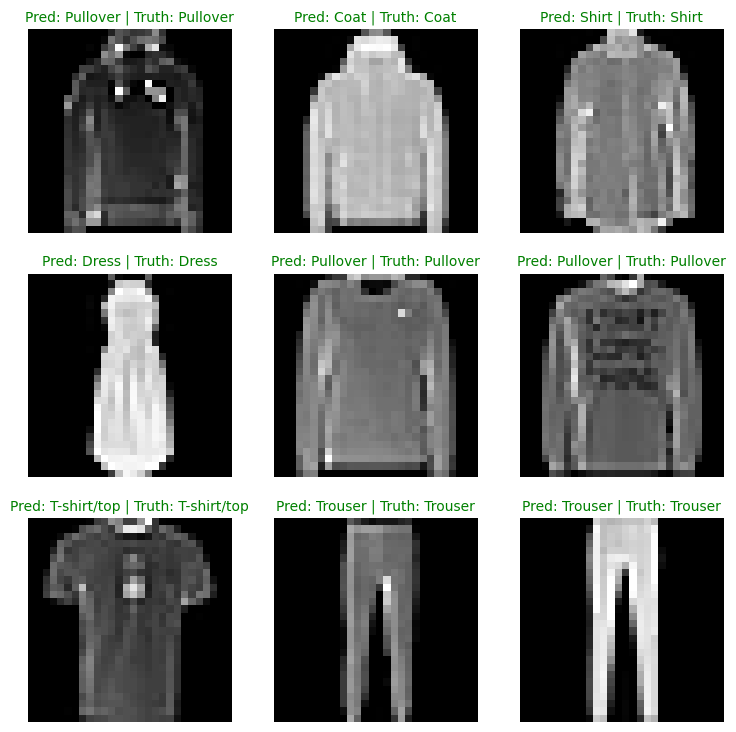

In [ ]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i ,sample in enumerate(test_samples):
  plt.subplot(ncols,nrows,i+1)
  plt.imshow(sample.squeeze(),cmap='gray')

  pred_label= class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c='g')
  else:
    plt.title(title_text,fontsize=10,c='r')
  plt.axis(False)

In [ ]:
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making Predictions...."):
    X, y = X.to(device),y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.to('cpu'))

#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making Predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([0, 6, 2, 7, 0, 5, 8, 4, 7, 6])

In [ ]:
y_pred_tensor.shape

torch.Size([10016])

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 5.1 MB/s eta 0:00:00


In [ ]:
!pip install mlxtend

import torchmetrics
mlxtend.__version__

'0.23.1'

In [ ]:
from torchmetrics import ConfusionMatrix
#from mlxtend import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets,
                         )



ValueError: ('The `preds` and `target` should have the same shape,', ' got `preds` with shape=torch.Size([10016]) and `target` with shape=torch.Size([10000]).')